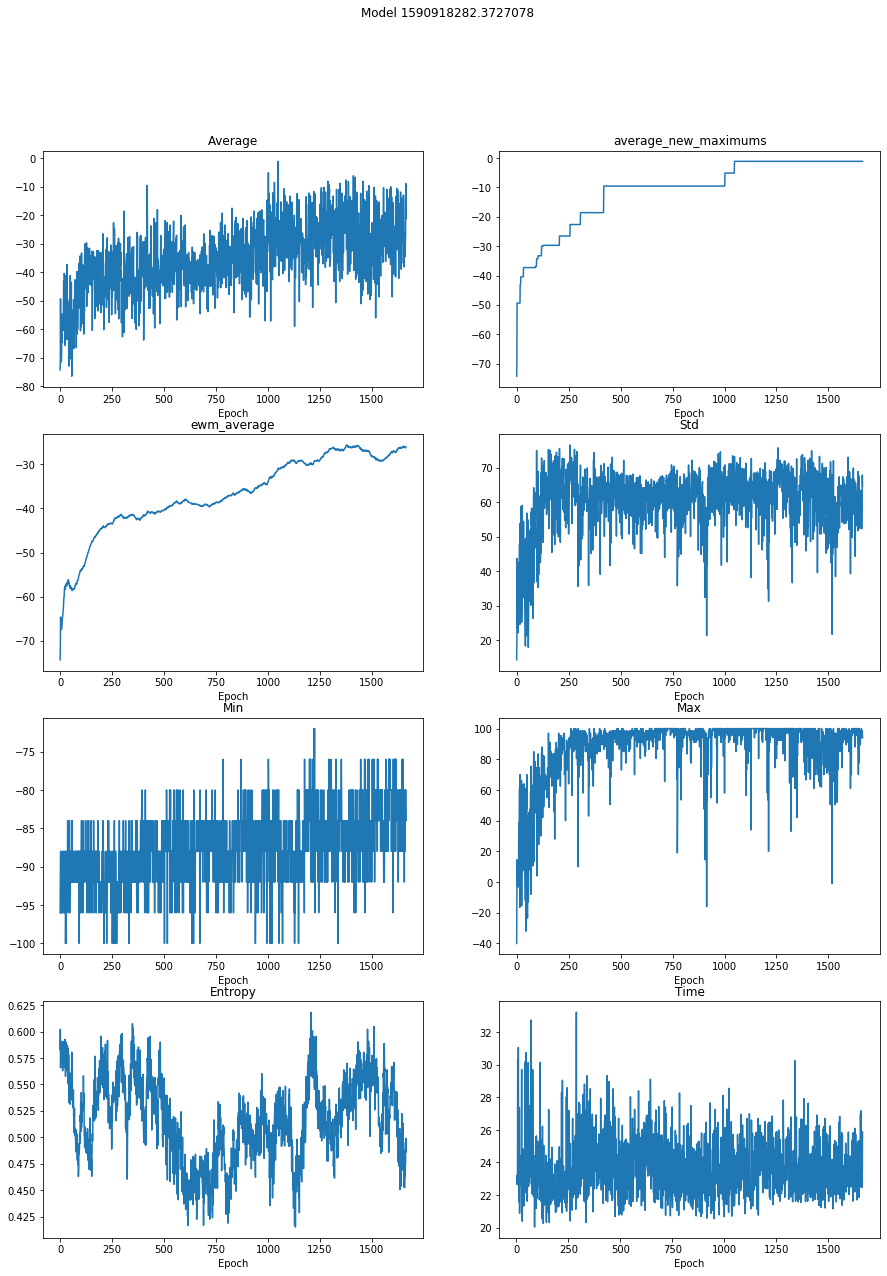

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

model_name = sorted(os.listdir('trained_models/reinforcement_learning'))[-1]
df = pd.read_csv(f'trained_models/reinforcement_learning/{model_name}/progress.txt', sep='\t').set_index('Epoch')


fig, ax = plt.subplots(4, 2, figsize=(15, 20))
_ = fig.suptitle(f'Model {model_name}')
_ = df.AverageEpRet.plot(title='Average', ax=ax[0, 0])
_ = df.AverageEpRet.expanding().max().plot(title='average_new_maximums', ax=ax[0, 1])
_ = df.AverageEpRet.ewm(100).mean().plot(title='ewm_average', ax=ax[1, 0])

_ = df.StdEpRet.plot(title='Std', ax=ax[1, 1])
_ = df.MinEpRet.plot(title='Min', ax=ax[2, 0])
_ = df.MaxEpRet.plot(title='Max', ax=ax[2, 1])
_ = df.Entropy.plot(title='Entropy', ax=ax[3, 0])
_ = df.Time.diff(1).plot(title='Time', ax=ax[3, 1])

fig.savefig(f'reports/Report for model {model_name}.png')